In [2]:
import pandas as pd
import seaborn as sns

In [81]:
data = pd.read_csv("https://stepik.org/media/attachments/lesson/802033/students.csv")

## 3. Базовые операции с данными

### 3.2 Пропуски в данных

Cколько людей не захотели заполнять признак "Children number"?

In [11]:
data['Children number'].value_counts(dropna=False)

Children number
2.0       47
0.0       37
NaN       36
1.0       34
3.0       16
2.5        4
1.5        4
4.0        3
6.0        2
5.0        1
1024.0     1
0.5        1
Name: count, dtype: int64

Будем заполнять пропуски в признаке "Вес". Но не просто так. Разобьем нашу таблицу на две таблицы:

females=(все женщины из исходной таблицы)

males=(все мужчины из исходной таблицы)

In [18]:
females = data[data["Sex"] == "женский"].copy()
males = data[data["Sex"] == "мужской"].copy()

Далее в таблице females заполните пропуски в столбце "Вес", записав туда средний вес женщин. В таблице males заполните пропуски в столбце "Вес", записав туда средний вес мужчин.

In [20]:
females["Weight"] = females["Weight"].fillna(females["Weight"].mean())
males["Weight"] = males["Weight"].fillna(males["Weight"].mean())

Далее объедините таблицы males и females в одну   
Далее в таблице df_new подсчитайте средний вес людей

In [24]:
df_new = pd.concat([males, females])

df_new["Weight"].mean()

63.53201161071252

Будем заполнять пропуски в признаке "Желаемое число детей" ("Children number"). Но не просто так. Разобьем нашу таблицу на две таблицы:

singles=(все, у кого нет ни брата ни сестры)

sublings=(все, кто не попал в таблицу singles)

In [26]:
singles = data[data["Brother-sister"] == "нет ни брата ни сестры"].copy()
sublings = data[data["Brother-sister"] != "нет ни брата ни сестры"].copy()

In [27]:
print(singles['Children number'].median())
print(sublings['Children number'].median())

1.0
2.0


Далее в таблице singles заполните пропуски в столбце "Children number", записав туда медианное значение по этой таблице. Аналогично поступите с таблицей sublings. 

In [29]:
singles["Children number"] = singles["Children number"].fillna(
    singles["Children number"].median()
)

sublings["Children number"] = sublings["Children number"].fillna(
    sublings["Children number"].median()
)

Далее объедините таблицы singles и sublings в одну  
Далее в таблице df_new подсчитайте медиану признака "Children number". 

In [31]:
df_new = pd.concat([singles, sublings])

df_new["Children number"].median()

2.0

### 3.3 Выбросы и аномалии

Будем применять метод, который в лекциях назван "Второй способ поиска выбросов". 

Мы спрашивали у студентов, какой сейчас возраст у В.В. Путина (опрос проводился в сентябре 2022г). 

Результаты опроса показали, что некоторые студенты не проявили достаточного почтения к содержанию вопроса. Предлагается найти всех таких студентов с помощью "Второго способа поиска выбросов" и удалить их из таблицы в качестве наказания!

Повторите действия из "Второго способа поиска выбросов" для признака "Putin age".

Сколько студентов осталось после этого в нашей таблице? 

In [32]:
data["Putin age"].describe()

count       186.000000
mean        690.236559
std        7360.321689
min          42.000000
25%          67.000000
50%          69.000000
75%          70.000000
max      100000.000000
Name: Putin age, dtype: float64

In [35]:
q1 = data["Putin age"].describe().loc["25%"]
q3 = data["Putin age"].describe().loc["75%"]
iqr = q3 - q1

In [38]:
data[(data["Putin age"] > q1 - 1.5 * iqr) & (data["Putin age"] < q3 + 1.5 * iqr)].shape

(148, 48)

In [39]:
data[(data["Putin age"] > q1 - 1.5 * iqr) & (data["Putin age"] < q3 + 1.5 * iqr)][
    "Putin age"
].median()

69.0

### 3.4 Кластеризация

In [51]:
from sklearn.cluster import KMeans

In [82]:
df_cut = data.copy()[["Weight", "Growth"]].dropna()

In [66]:
kMeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kMeans.fit(df_cut)
df_cut["Label"] = kMeans.labels_

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Weight', ylabel='Growth'>

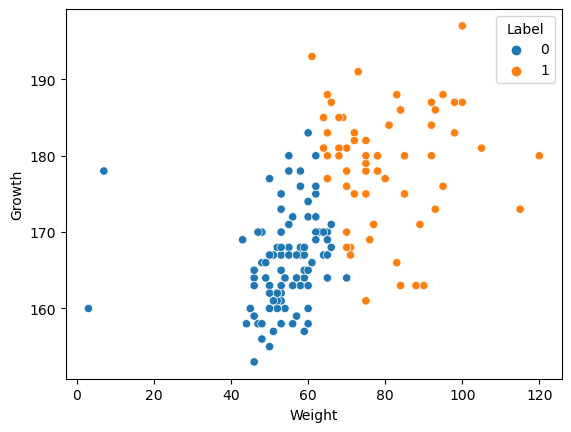

In [67]:
sns.scatterplot(data=df_cut, x="Weight", y="Growth", hue="Label")

In [69]:
kMeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kMeans.fit(df_cut)
df_cut["Label"] = kMeans.labels_

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='Weight', ylabel='Growth'>

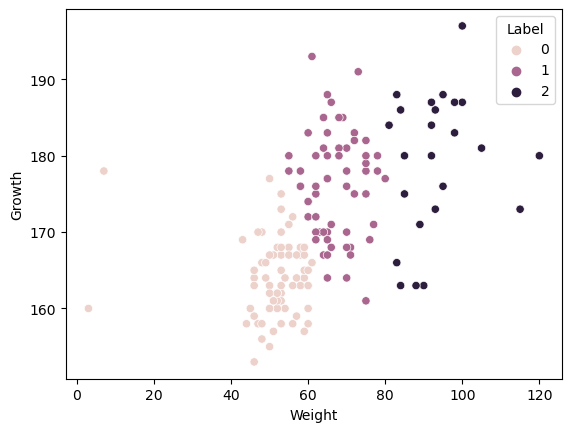

In [70]:
sns.scatterplot(data=df_cut, x="Weight", y="Growth", hue="Label")

Запустите алгоритм kmeans с параметрами n_clusters=2, random_state=1 (параметр random_state=1 нужен для того, чтобы у всех обучающихся был одинаковый ответ, без этого параметра ответы у разных людей могут быть разные).

В окошко ответа запишите количество студентов, которым после кластеризации была присвоена метка 0.

In [88]:
kMeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kMeans.fit(df_cut)
df_cut["Label"] = kMeans.labels_

sum(df_cut['Label'] == 0)

c:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


97